In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.svm import OneClassSVM
from sklearn.pipeline import Pipeline
import os
import glob
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree

In [34]:
os.chdir("D:/Data")
csv_data_path = 'D:/Data/'

In [35]:
traindata = pd.read_csv('D:/Data/preprocessed_train_DT_2018.csv')
testdata = pd.read_csv('D:/Data/preprocessed_test_DT_2018.csv')
traindata.pop("Unnamed: 0")
testdata.pop("Unnamed: 0")

traindata.shape

(79999, 81)

In [36]:
testdata.shape

(20000, 81)

In [37]:
Y = traindata.pop('Label')
X = traindata.iloc[:,0:82]
C = testdata.pop('Label')
T = testdata.iloc[:,0:82]

X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79999 entries, 0 to 79998
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           79999 non-null  int64  
 1   Flow Duration      79999 non-null  int64  
 2   Tot Fwd Pkts       79999 non-null  int64  
 3   Tot Bwd Pkts       79999 non-null  int64  
 4   TotLen Fwd Pkts    79999 non-null  int64  
 5   TotLen Bwd Pkts    79999 non-null  int64  
 6   Fwd Pkt Len Max    79999 non-null  int64  
 7   Fwd Pkt Len Min    79999 non-null  int64  
 8   Fwd Pkt Len Mean   79999 non-null  float64
 9   Fwd Pkt Len Std    79999 non-null  float64
 10  Bwd Pkt Len Max    79999 non-null  int64  
 11  Bwd Pkt Len Min    79999 non-null  int64  
 12  Bwd Pkt Len Mean   79999 non-null  float64
 13  Bwd Pkt Len Std    79999 non-null  float64
 14  Flow Byts/s        79999 non-null  float64
 15  Flow Pkts/s        79999 non-null  float64
 16  Flow IAT Mean      799

In [38]:
_traindata = np.array(X)
_trainlabel = np.array(Y)
_traindata = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
_testdata = np.array(T)
_testlabel = np.array(C)
_testdata = T.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
_trainlabel

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [39]:
#Normalization des données d'apprentissage
#données des features
from sklearn import preprocessing
_traindataNp = _traindata.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
_traindata_scaled = min_max_scaler.fit_transform(_traindataNp)

In [40]:
#données des tests
_testdata_np = _testdata.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
_testdata_scaled = min_max_scaler.fit_transform(_testdata_np)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
# 5. Declare data preprocessing steps
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('min_max_scaler', min_max_scaler),('dec_tree', dec_tree)])
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
# Add a dict of estimator and estimator related parameters in this list
parameters = dict(
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [42]:

clf = GridSearchCV(pipe, parameters, cv=10,verbose=1,n_jobs=-1)
clf.fit(_traindata, _trainlabel)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   43.2s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12]},
             verbose=1)

In [43]:
print (clf.refit)
 
# 9. Evaluate model pipeline on test data
pred = clf.predict(_testdata)
from sklearn.metrics import accuracy_score
print(accuracy_score(_testlabel, pred))

True
0.99755


In [44]:
#  Save model for future use
from joblib import dump, load
dump(clf, 'dt_intrusion_detection_binary_classification.pkl')

['dt_intrusion_detection_binary_classification.pkl']

In [45]:
print('Best Criterion:', clf.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['dec_tree__max_depth'])
print(); print(clf.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 12

DecisionTreeClassifier(criterion='entropy', max_depth=12)


In [46]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(_testlabel, pred)
print(classification_report(_testlabel, pred))
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8617
           1       1.00      1.00      1.00     11383

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

[[ 8609     8]
 [   41 11342]]


In [23]:
clfDT = tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12)
clfDT = clfDT.fit(_traindata, _trainlabel)

In [31]:
# 9. Evaluate model pipeline on test data
pred = clfDT.predict(_testdata)


from sklearn.metrics import accuracy_score
print(accuracy_score(_testlabel, pred))

0.9975


In [32]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(_testlabel, pred)
print(classification_report(_testlabel, pred))
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8617
           1       1.00      1.00      1.00     11383

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

[[ 8607    10]
 [   40 11343]]


Area under the ROC curve : 0.998964


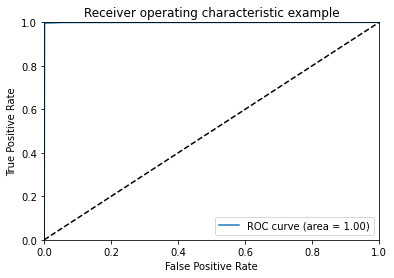

In [37]:
from sklearn.metrics import roc_curve, auc

probas = clfDT.predict_proba(_testdata)
# probas est une matrice de deux colonnes avec la proabilités d'appartenance à chaque classe

fpr, tpr, thresholds = roc_curve(_testlabel.ravel(), probas[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right");

In [ ]:
#Méthode avec GA

In [22]:
from genetic_selection import GeneticSelectionCV
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
estimator = tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12)
cv = GeneticSelectionCV(estimator,
                                  cv=10,
                                  verbose=1,
                                  scoring="accuracy",
                                  max_features=20,
                                  n_population=50,
                                  crossover_proba=0.5,
                                  mutation_proba=0.2,
                                  n_generations=40,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=10,
                                  caching=True,
                                  n_jobs=-1)

print(cv.fit(_traindata, _trainlabel))

Selecting features with genetic algorithm.
gen	nevals	avg                      	std                    	min                    	max                      
0  	50    	[ 0.93579418 11.64      ]	[0.08630556 5.42497926]	[0.62987059 1.        ]	[ 0.99792497 20.        ]
1  	38    	[ 0.98768118 14.7       ]	[0.01402055 2.83725219]	[0.93852472 9.        ]	[ 0.99794997 20.        ]
2  	32    	[ 0.99648547 16.24      ]	[0.00420147 2.11243935]	[ 0.97908747 11.        ]	[ 0.99794997 20.        ]
3  	29    	[ 0.99789097 16.88      ]	[5.94298279e-05 1.77358394e+00]	[ 0.99767495 14.        ]	[ 0.99796248 20.        ]
4  	21    	[ 0.99789497 17.02      ]	[2.12974021e-04 1.84921605e+00]	[ 0.99642495 14.        ]	[ 0.99796248 20.        ]
5  	27    	[ 0.99626596 17.04      ]	[0.00810512 1.6365818 ]        	[ 0.95546223 15.        ]	[ 0.99796248 20.        ]
6  	30    	[ 0.99688897 17.26      ]	[0.0058074  1.46710599]        	[ 0.95768722 14.        ]	[ 0.99798747 20.        ]
7  	30    	[ 0.99791272 17.

In [23]:
genfeats = _traindata.columns[cv.support_]
genfeats = list(genfeats)
print("Chosen Feats:  ", genfeats)
#Le dernier score MCC (Matthews correlation coefficient) comme score final du modèle, qui est le meilleur
cv_score = cv.generation_scores_[-1]
print("score",cv_score) 

Chosen Feats:   ['Dst Port', 'Tot Bwd Pkts', 'Fwd Pkt Len Std', 'Bwd Pkt Len Min', 'Bwd IAT Max', 'Bwd Pkts/s', 'Pkt Len Min', 'URG Flag Cnt', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Bwd Blk Rate Avg', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Active Mean', 'Active Min', 'Protocol_6', 'Protocol_17']
score 0.9979874749968747


In [24]:
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score,classification_report


pred = cv.predict(_testdata)
results = confusion_matrix(_testlabel, pred)
error = zero_one_loss(_testlabel, pred)
accuracy_score = accuracy_score(_testlabel, pred)
print(" Results\n======================\nConfusion Matrix:\n{}\nError Value:{}\nAccuracy_Score:{}\n".format(results, error, accuracy_score))


 Results
Confusion Matrix:
[[ 8613     4]
 [   37 11346]]
Error Value:0.0020499999999999963
Accuracy_Score:0.99795



In [13]:
#apprentissage du Decision Tree avec la selection de variable de GA

In [25]:
traindata = pd.read_csv('D:/Data/preprocessed_train_DT_2018.csv')
testdata = pd.read_csv('D:/Data/preprocessed_test_DT_2018.csv')
traindata.pop("Unnamed: 0")
testdata.pop("Unnamed: 0")

0            9
1           20
2           22
3           23
4           25
         ...  
19995    99985
19996    99987
19997    99990
19998    99993
19999    99996
Name: Unnamed: 0, Length: 20000, dtype: int64

In [26]:
Y = traindata.pop('Label')
X = traindata.iloc[:,0:82]
X = traindata[['Dst Port', 'Tot Bwd Pkts', 'Fwd Pkt Len Std', 'Bwd Pkt Len Min', 'Bwd IAT Max', 'Bwd Pkts/s', 'Pkt Len Min', 'URG Flag Cnt', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Bwd Blk Rate Avg', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Active Mean', 'Active Min', 'Protocol_6', 'Protocol_17']]
C = testdata.pop('Label')
T = testdata.iloc[:,0:82]
T = testdata[['Dst Port', 'Tot Bwd Pkts', 'Fwd Pkt Len Std', 'Bwd Pkt Len Min', 'Bwd IAT Max', 'Bwd Pkts/s', 'Pkt Len Min', 'URG Flag Cnt', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Bwd Blk Rate Avg', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Active Mean', 'Active Min', 'Protocol_6', 'Protocol_17']]



In [27]:
_traindata = np.array(X)
_trainlabel = np.array(Y)
_traindata = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
_testdata = np.array(T)
_testlabel = np.array(C)
_testdata = T.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
_traindata

,Dst Port,Tot Bwd Pkts,Fwd Pkt Len Std,Bwd Pkt Len Min,Bwd IAT Max,Bwd Pkts/s,Pkt Len Min,URG Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Bwd Blk Rate Avg,Init Fwd Win Byts,Init Bwd Win Byts,Active Mean,Active Min,Protocol_6,Protocol_17
0,500,0,0.000000,0,0,0.000000,500,0,0,0,583.333333,0,-1,-1,4000407.0,4000407,0,1
1,3389,8,196.550183,0,953120,1.957627,0,0,1,0,151.047619,0,8192,62644,0.0,0,1,0
2,0,0,0.000000,0,0,0.000000,0,0,0,0,0.000000,0,-1,-1,0.0,0,0,0
3,443,0,17.897858,0,0,0.000000,0,0,0,0,10.333333,0,257,-1,0.0,0,1,0
4,139,3,0.000000,0,6099854,0.326774,0,0,0,3,0.000000,0,1024,8192,3080815.0,3080815,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,80,0,0.000000,0,0,0.000000,0,0,0,0,0.000000,0,2053,-1,0.0,0,1,0
79995,80,4,283.533419,0,5000915,0.798844,0,0,1,0,516.222222,0,8192,220,0.0,0,1,0
79996,80,4,352.000000,0,5005165,0.798316,0,0,1,1,342.125000,0,8192,222,0.0,0,1,0
79997,80,0,0.000000,0,0,0.000000,0,0,0,0,0.000000,0,2053,-1,0.0,0,1,0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
# 5. Declare data preprocessing steps
min_max_scaler = preprocessing.MinMaxScaler()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('min_max_scaler', min_max_scaler),('dec_tree', dec_tree)])
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
# Add a dict of estimator and estimator related parameters in this list
parameters = dict(
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [29]:
clf = GridSearchCV(pipe, parameters, cv=10,verbose=1,n_jobs=-1)
clf.fit(_traindata, _trainlabel)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    8.8s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12]},
             verbose=1)

In [30]:
print (clf.refit)
 
# 9. Evaluate model pipeline on test data
pred = clf.predict(_testdata)
from sklearn.metrics import accuracy_score
print(accuracy_score(_testlabel, pred))

True
0.998


In [31]:
print('Best Criterion:', clf.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['dec_tree__max_depth'])
print(); print(clf.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 10

DecisionTreeClassifier(criterion='entropy', max_depth=10)


In [32]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(_testlabel, pred)
print(classification_report(_testlabel, pred))
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8617
           1       1.00      1.00      1.00     11383

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

[[ 8614     3]
 [   37 11346]]
